# How to use the FairFL-Data framework

Overall, this framework can be used to generate data for fair Federated Learning settings and Federated Learning settings in general. The data is non-synthetic but based on the ACSIncome and ACSEmployment dataset. It is evaluated with regard to fairness metrics during the generation. As our implementation is based on Flower Datasets Module, we recommend to read the documentation at https://flower.ai/docs/datasets/index.html.


## 1. Generating a FairFL Dataset

To generate a dataset and its partitions, you need to specify the name of the dataset (ACSIncome/ACSEmployment) and the states you want to load. The states are internally stored as "splits". For each state it is additionally required to specify a partitioner if this state should be considered for the internal evaluations. If no states and no partitioner are specified this defaults to lading all states as a single partition. For using partitioners, we refer to https://flower.ai/docs/datasets/tutorial-use-partitioners.html.

In this example, we apply the default IIDPartitioner which is initialized internally by simply giving a number of desired partitions per state.


/home/heilmann/Dokumente/fairFL-data/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/heilmann/Dokumente/fairFL-data/.venv/lib/python3.12/site-packages/flwr_datasets/utils.py:109: UserWarning: The currently tested dataset are ['mnist', 'ylecun/mnist', 'cifar10', 'uoft-cs/cifar10', 'fashion_mnist', 'zalando-datasets/fashion_mnist', 'sasha/dog-food', 'zh-plus/tiny-imagenet', 'scikit-learn/adult-census-income', 'cifar100', 'uoft-cs/cifar100', 'svhn', 'ufldl-stanford/svhn', 'sentiment140', 'stanfordnlp/sentiment140', 'speech_commands', 'LIUM/tedlium', 'flwrlabs/femnist', 'flwrlabs/ucf101', 'flwrlabs/ambient-acoustic-context', 'jlh/uci-mushrooms', 'Mike0307/MNIST-M', 'flwrlabs/usps', 'scikit-learn/iris', 'flwrlabs/pacs', 'flwrlabs/cinic10', 'flwrlabs/caltech101', 'flwrlabs/office-home', 'flwrlabs/

{'CT': <flwr_datasets.partitioner.iid_partitioner.IidPartitioner object at 0x775957cc4140>, 'AK': <flwr_datasets.partitioner.iid_partitioner.IidPartitioner object at 0x775957ca7f80>}
['CT', 'AK']


/home/heilmann/Dokumente/fairFL-data/.venv/lib/python3.12/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(
/home/heilmann/Dokumente/fairFL-data/.venv/lib/python3.12/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of type 'ClassLabel' to create a verbose names. The available names will used.
  warnings.warn(
/home/heilmann/Dokumente/fairFL-data/src/fairfl_data/evaluation.py:147: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_dis.show()
/home/heilmann/Dokumente/fairFL-data/.venv/lib/python3.12/site-packages/flwr_datasets/metrics/utils.py:130: UserWarning: The verbose names can not be established. The column specified by 'column_name' needs to be of typ

DatasetDict({
    CT: Dataset({
        features: ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P', 'PINCP'],
        num_rows: 19785
    })
    AK: Dataset({
        features: ['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX', 'RAC1P', 'PINCP'],
        num_rows: 3546
    })
})


Creating CSV from Arrow format: 100%|██████████| 2/2 [00:00<00:00, 89.24ba/s]


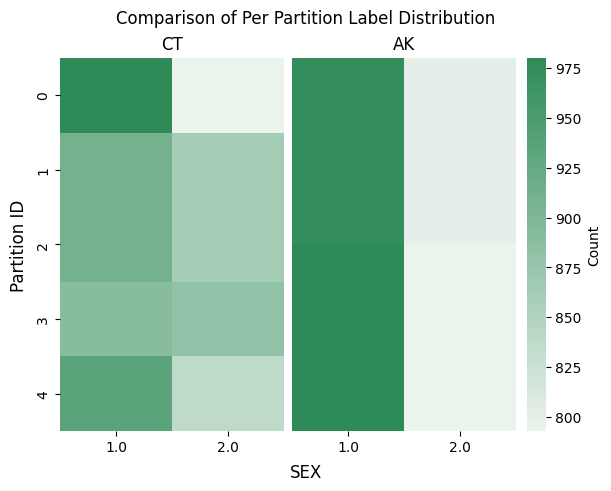

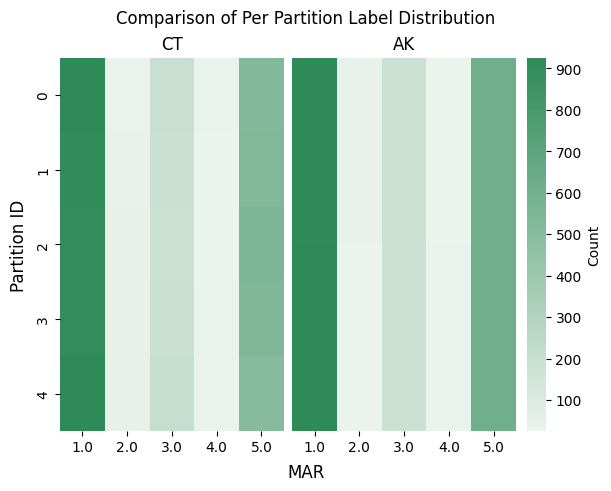

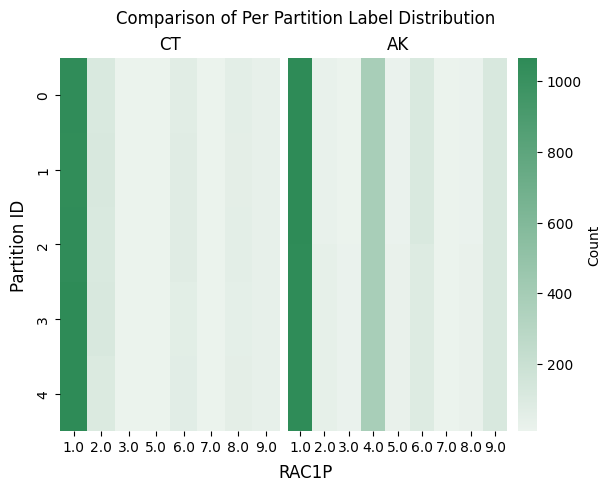

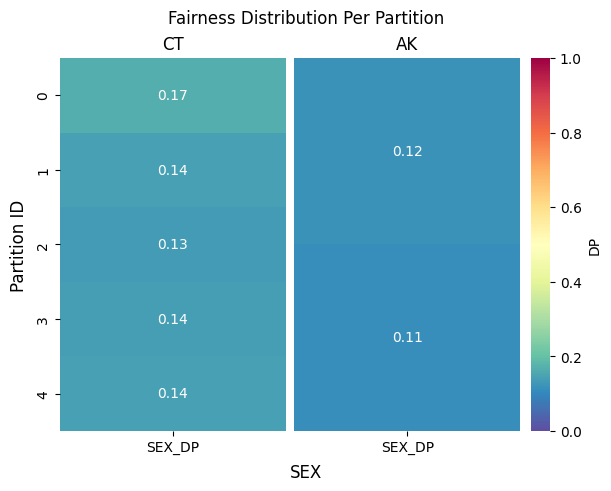

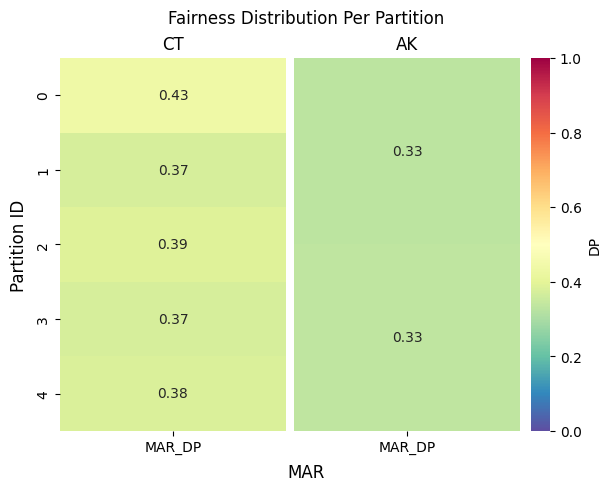

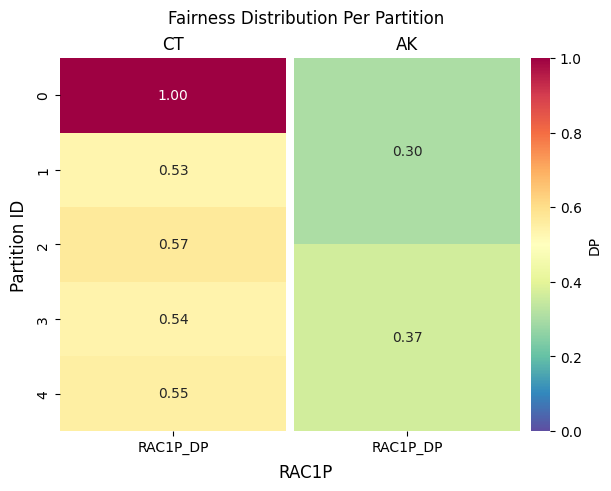

In [1]:
from src.fairfl_data.FairFederatedDataset import FairFederatedDataset

#specify the FL dataset, sets 5 partitions for CT and 2 for AK
ffds = FairFederatedDataset(dataset="ACSIncome", states=["CT", "AK"],
                                            partitioners={"CT":5, "AK":2 }, fl_setting=None,
                                            fairness_metric="DP", fairness_level="attribute")

#Calling one of the following additionally returns evaluation for the complete dataset, as only then data is downloaded
#load the first partition of CT
partition_CT_0 = ffds.load_partition(split="CT", partition_id=0)

#load the complete state CT
split_CT = ffds.load_split("CT")

# the data can be stored with
ffds.save_dataset("data")


## 2. Modifying the data during creation

## 3. Evaluating the data on a set of models

# Training a